# Laboratorio 2 - Perceptrón para clasificar lirios - Práctica 1

Grupo B07

- Álvaro Ramos Morales

- Álvaro Delgado Gallego

- Fernando Ramírez Fernández

- Juan Esteban Bernal Santos

In [ ]:
# Se importan las librerías necesarias para el desarrollo de la práctica
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score

## Estudio del dataset Iris

In [ ]:
# Cargamos el conjunto de datos de iris
iris = load_iris()

# Ver las primeras 5 filas de datos
print("\nPrimeras 5 filas de datos:")
print(iris.data[:5])

# Ver las etiquetas de las clases
print("\nEtiquetas de las clases:")
print(iris.target_names)

# Ver la descripción del conjunto de datos
print("\nDescripción del conjunto de datos:")
print(iris.DESCR)


Primeras 5 filas de datos:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Etiquetas de las clases:
['setosa' 'versicolor' 'virginica']

Descripción del conjunto de datos:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal

In [ ]:
def train_perceptron(X, y, learning_rate, threshold, test_size=0.1, validation_size=0.2, max_iterations=25000):
    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # División adicional para conjunto de validación si se proporciona un tamaño
    if validation_size > 0:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)
    
    num_samples, num_features = X_train.shape
    # Añadir una columna de unos para el sesgo
    X_train = np.hstack((np.ones((num_samples, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    if validation_size > 0:
        X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
    
    # Inicializar los pesos al azar (incluyendo el sesgo)
    weights = np.random.uniform(-1, 1, size=num_features + 1)
    
    # Inicializamos el error para iniciar el bucle
    error = threshold + 1

    iteration = 0
    results = []
    
    while error > threshold: #and iteration < max_iterations:
        error = 0
        for i in range(num_samples):
            # Cálculo de la salida del perceptrón
            output = np.dot(X_train[i], weights)
            predicted = 1 if output >= 0 else -1
            
            # Actualización de pesos
            delta = learning_rate * (y_train[i] - predicted)
            weights += delta * X_train[i]
            
            # Cálculo de error
            error += int(y_train[i] != predicted)
        
        # Almacenar resultados de la iteración
        results.append([iteration+1, X_train[:, 1:num_features+1].tolist(), weights.tolist()])
        iteration += 1
    
    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(results, columns=['Iteración', 'X', 'Pesos finales'])
    
    # Evaluación en conjunto de prueba
    test_accuracy = np.mean(np.sign(np.dot(X_test, weights)) == y_test)
    
    # Evaluación en conjunto de validación si se proporciona
    if validation_size > 0:
        val_accuracy = np.mean(np.sign(np.dot(X_val, weights)) == y_val)
    else:
        val_accuracy = None
    
    # Retornar los pesos finales y el DataFrame de resultados, así como las métricas de evaluación
    return weights, results_df, test_accuracy, val_accuracy

In [ ]:
# Función para graficar puntos de distinto color para cada tipo de lirio
def plot_iris_data(X, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend='full')
    plt.xlabel('Longitud del sépalo')
    plt.ylabel('Anchura del sépalo')
    plt.title('Distribución de los tipos de lirio')
    plt.grid(True)
    plt.show()

In [ ]:
# Función para dibujar el hiperplano
def plot_hyperplane(X, y, weights, ax):
    if ax is None:
        ax = plt.gca()
    
    # Graficar puntos de dispersión
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend='full', ax=ax)

    # Calcular la ecuación del hiperplano
    w0, w1, w2 = weights  # Obtener los pesos
    x1_values = np.array([X[:, 0].min(), X[:, 0].max()])
    x2_values = -(w1 / w2) * x1_values - (w0 / w2)
    
    # Graficar la línea separadora
    ax.plot(x1_values, x2_values, 'k--', label='Hiperplano')
    
    # Mostrar ecuación del hiperplano en términos de x2
    slope = -(w1 / w2)
    intercept = -(w0 / w2)
    ec_plano = f'x2 = {slope:.2f} * x1 + {intercept:.2f}'
    ax.text(0.95, 0.05, ec_plano, fontsize=8, transform=ax.transAxes, ha='right')
    
    ax.set_xlabel('Longitud del sépalo')
    ax.set_ylabel('Anchura del sépalo')
    ax.set_title(f'Hiperplano LR={lr}, TH={th}')
    ax.legend()

    return ec_plano

## Cuestión 1

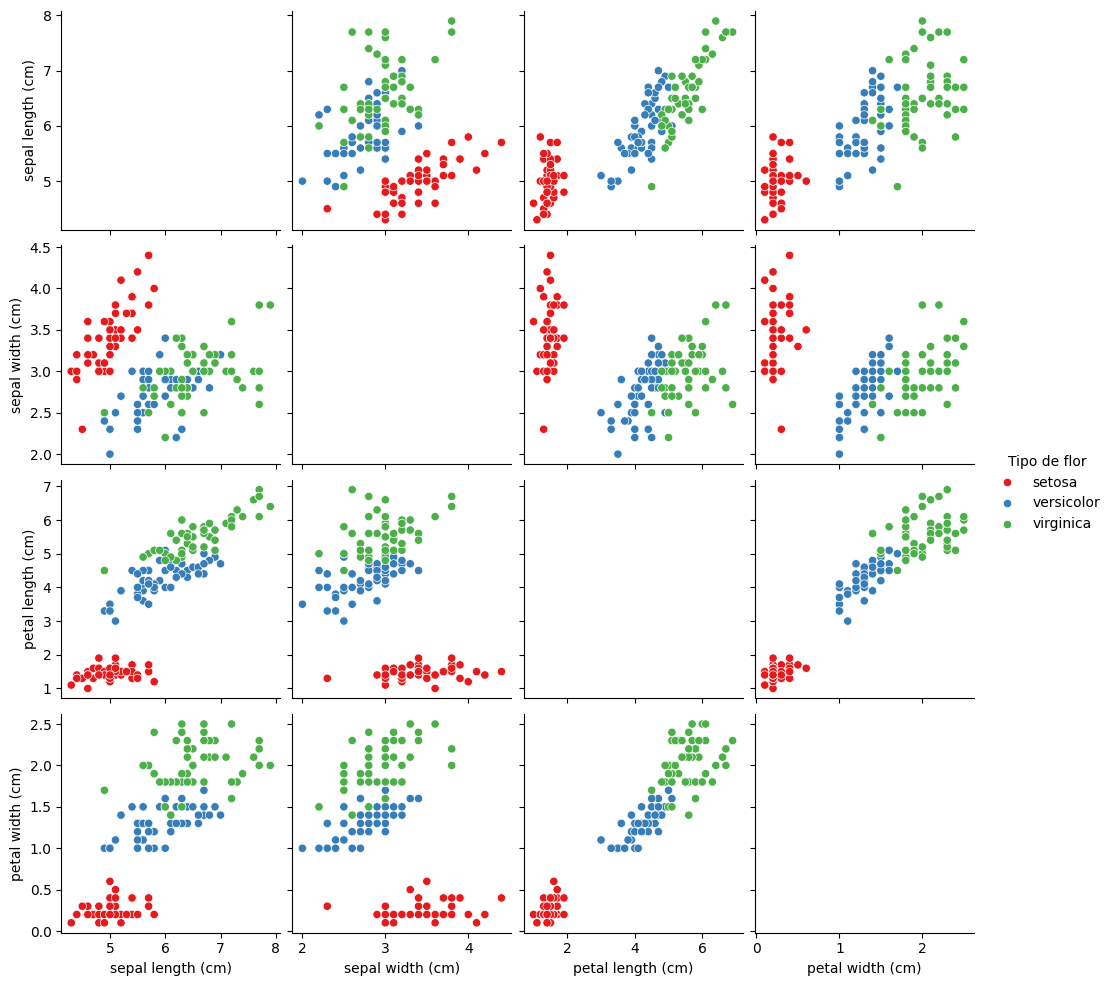

In [ ]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Creamos un DataFrame para facilitar la visualización
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Tipo de flor'] = y
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Tipo de flor'] = iris_df['Tipo de flor'].map(species_names)

# Generamos gráficas de dispersión para cada par de atributos
g = sns.pairplot(iris_df, hue='Tipo de flor', palette='Set1', diag_kind='None')

plt.show()

Debido a la relación observada entre cada par de variables dentro del dataset, se determina que el par más adecuado para la clasificación es el de "petal length" (longitud del pétalo) con "petal width" (anchura del pétalo). Esta selección se basa en varias consideraciones: la combinación de "petal length" y "petal width" muestra una distinción más notoria entre las tres clases de flores (setosa, versicolor y virginica) en comparación con otros pares de variables, lo que significa que estas dos características tienen la capacidad de separar eficazmente las diferentes clases de flores en el espacio de características. 

Además, al observar los valores de las características dentro de cada clase, se nota que "petal length" y "petal width" exhiben patrones de comportamiento más similares dentro de una misma clase, lo que los hace más consistentes y distintivos para cada tipo de flor

In [ ]:
# Cargamos el conjunto de datos de iris
X = iris.data[:,(2,3)]  # Tomamos los dos atributos con mayor relevancia para la clasificación
y = np.where(iris.target != 0, 1, -1)  # Convertimos las etiquetas a +1 y -1

A continuación, se realizarán todas las posibles combinaciones entre hiperparámetros para determinar cuál configuración es la mejor.

In [ ]:
# Lista de hiperparámetros
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75]
thresholds = [0.05, 0.1, 0.25]

In [ ]:
""""""""""""""""""
"""****TEST*****"""
""""""""""""""""""

# Lista de hiperparámetros
lr = 0.25
th = 0.1

# Entrenamos el perceptrón
weights, results_df, test_accuracy, val_accuracy = train_perceptron(X, y, lr, th)
print(test_accuracy*100)
print(val_accuracy*100)

100.0
100.0


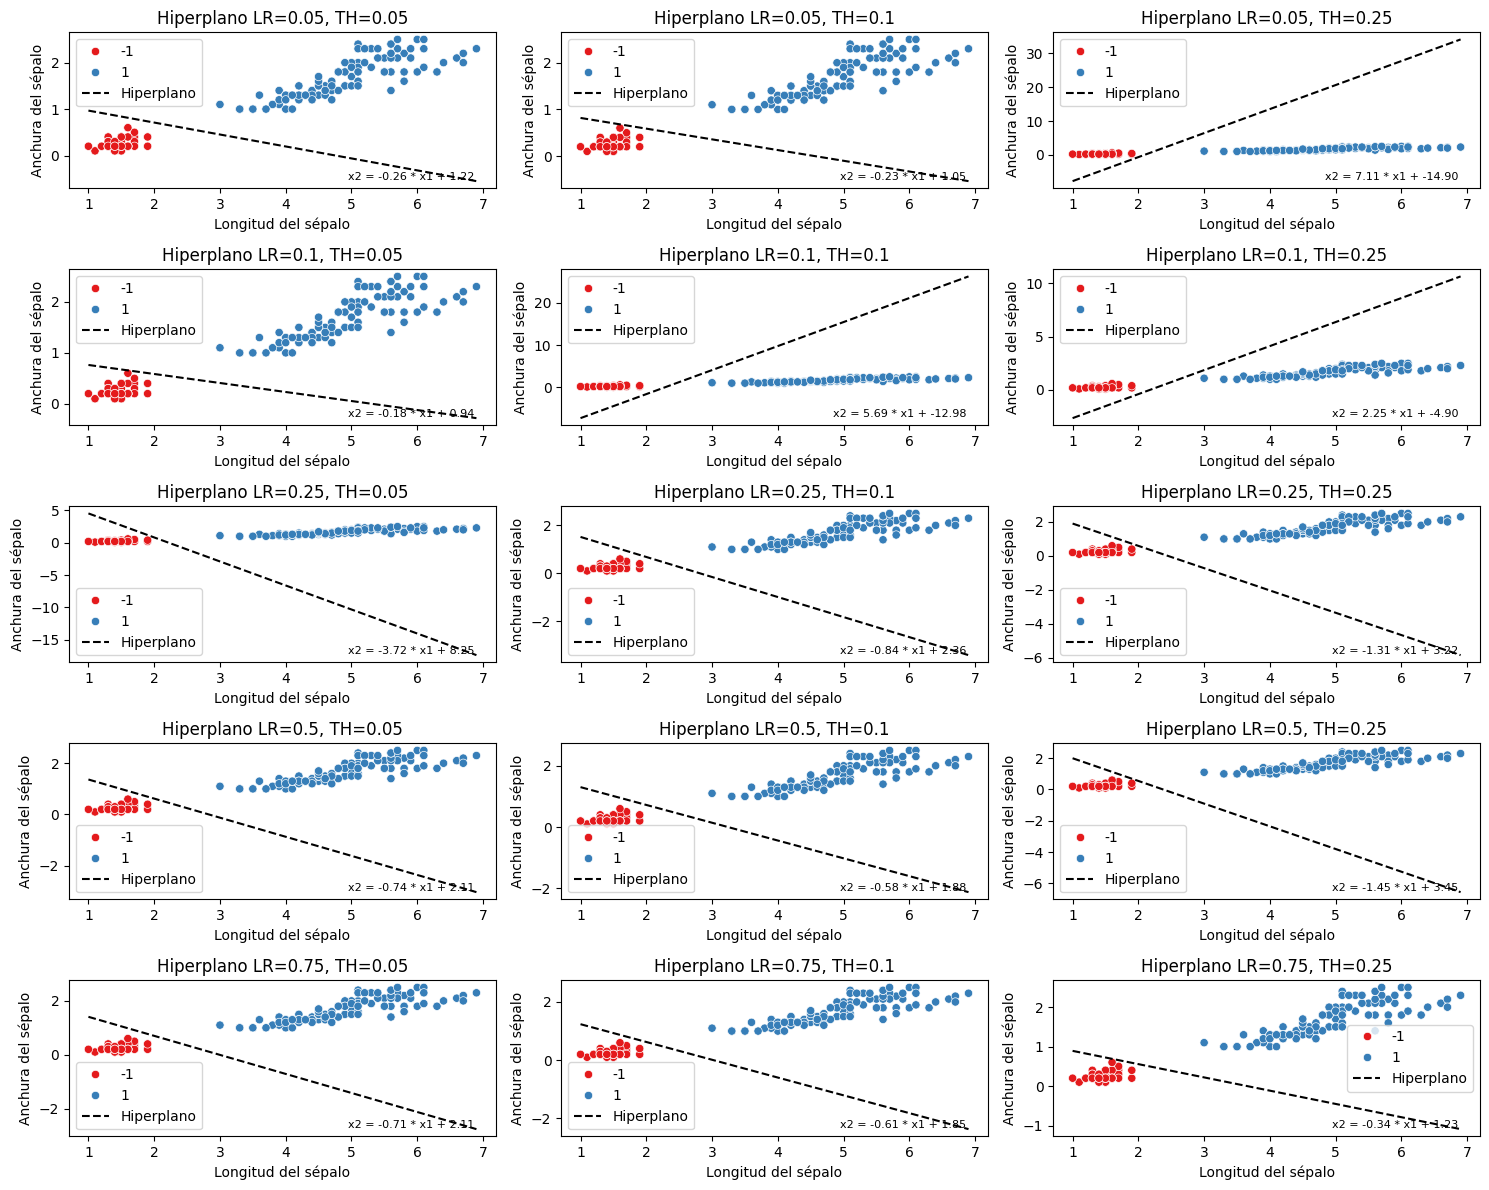

In [ ]:
# Generar todas las combinaciones de hiperparámetros
combinations = product(learning_rates, thresholds)

# Configuración del gráfico
num_rows = len(learning_rates)
num_cols = len(thresholds)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Ciclo for para recorrer todas las combinaciones de hiperparámetros
for i, (lr, th) in enumerate(combinations):
    # Entrenar el perceptrón con los hiperparámetros actuales
    weights, _, _, _ = train_perceptron(X, y, lr, th)
    
    # Dibujar el hiperplano correspondiente en el subgráfico actual
    ax = axs[i // num_cols, i % num_cols]
    plot_hyperplane(X, y, weights, ax)

plt.tight_layout()
plt.show()

De los resultados anteriores, la mejor configuración de hiperparámetros está dada por el learning_rate = 0.25 y threshold = 0.25

In [ ]:
# Lista de hiperparámetros
lr = 0.25
th = 0.1

In [ ]:
# Entrenamos el perceptrón
weights, results_df, test_accuracy, val_accuracy = train_perceptron(X, y, lr, th)

## Cuestión 2

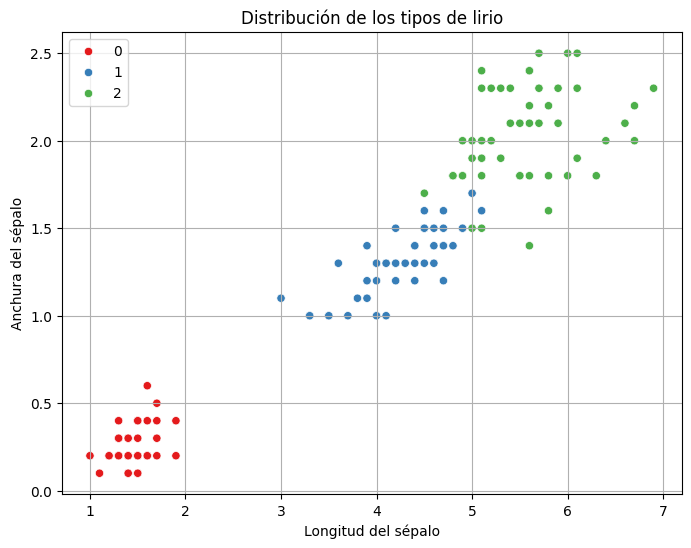

In [ ]:
# Graficamos la distribución de los tipos de lirio
plot_iris_data(X, iris.target)

In [ ]:
print("Bias(𝜃) del perceptrón:", weights[0]," |  Pesos: ", weights[1:])

Bias(𝜃) del perceptrón: -1.3002709158989392  |  Pesos:  [0.18229357 1.14553979]


Ecuación del hiperplano:  x2 = -0.16 * x1 + 1.14


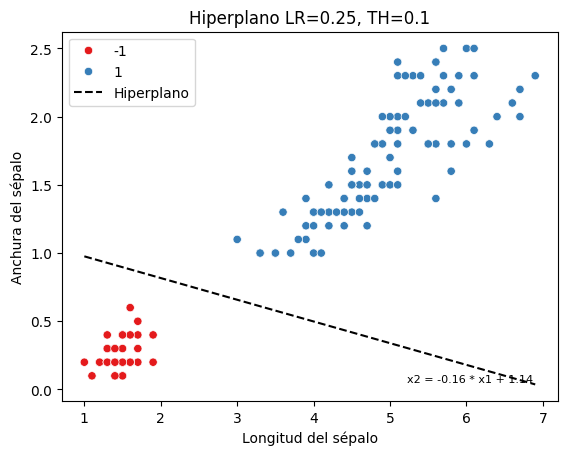

In [ ]:
# Graficamos el hiperplano resultante
ec_plano = plot_hyperplane(X, y, weights, None)
print("Ecuación del hiperplano: ", ec_plano)

In [ ]:
# Mostramos los resultados del entrenamiento
print(results_df)

   Iteración                                                  X  \
0          1  [[5.8, 1.8], [4.1, 1.3], [4.0, 1.3], [3.9, 1.4...   
1          2  [[5.8, 1.8], [4.1, 1.3], [4.0, 1.3], [3.9, 1.4...   

                                       Pesos finales  
0  [-1.3002709158989392, 0.18229356838113142, 1.1...  
1  [-1.3002709158989392, 0.18229356838113142, 1.1...  


## Cuestión 3

In [ ]:
# Lista de hiperparámetros
lr = 0.25
th = 0.5

In [ ]:
# Filtrar las muestras para tomar lirios setosos y versicolor únicamente
X_filtered = iris.data[iris.target != 2]
y_filtered = iris.target[iris.target != 2]

X_3_attributes = X_filtered[:, [0, 1, 2]]
X_4_attributes = X_filtered

# Entrenamiento del perceptrón con 3 atributos
weights_3_attributes, results_df_3_attributes, test_accuracy_3_attributes, _, _ = train_perceptron(X_3_attributes, y_filtered, lr, th)

# Entrenamiento del perceptrón con 4 atributos
weights_4_attributes, results_df_4_attributes, test_accuracy_4_attributes, _, _ = train_perceptron(X_4_attributes, y_filtered, lr, th)

print("Bias(𝜃) perceptrón de 3 atributos:", weights_3_attributes[0]," |  Pesos: ", weights_3_attributes[1:])
print("Bias(𝜃) perceptrón de 4 atributos:", weights_4_attributes[0]," |  Pesos: ", weights_4_attributes[1:])
print("Precisión del perceptrón de 3 atributos:", test_accuracy_3_attributes*100, "%")
print("Precisión del perceptrón de 4 atributos:", test_accuracy_4_attributes*100, "%")

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea434ecd-36a0-459f-990c-20e74b84c244' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>